### Exploratory Analysis 

In [54]:
!pip install -U pandas

In [55]:
!pip install -U seaborn

In [56]:
import pandas as pd
import numpy as np

https://www.kaggle.com/iabhishekofficial/mobile-price-classification


Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price
In this problem you do not have to predict actual price but a price range indicating how high the price is



-  id - ID
-  battery_power - Total energy a battery can store in one time measured in mAh
-  blue - Has bluetooth or not
-  clock_speed - speed at which microprocessor executes instructions
-  dual_sim - Has dual sim support or not
-  fc - Front Camera mega pixels
-  four_gHas 4G or not
-  int_memory - Internal Memory in Gigabytes
-  m_dep - Mobile Depth in cm
-  mobile_wt - Weight of mobile phone
-  n_cores - Number of cores of processor
-  pc - Primary Camera mega pixels
-  px_height - Pixel Resolution Height
-  px_width - Pixel Resolution Width
-  ram - Random Access Memory in Megabytes
-  sc_h - Screen Height of mobile in cm
-  sc_w - Screen Width of mobile in cm
-  talk_time - longest time that a single battery charge will last when you are
-  three_g - Has 3G or not
-  touch_screen - Has touch screen or not
-  wifi - Has wifi or not
-  price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [57]:
data = pd.read_csv('./mobile_price_classification.csv')

In [58]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1.0,0,7,0.6,188.0,...,20,756,2549.0,9,7,19,0,0,1,1
1,2,1021,1,0.5,1,NaN,1,53,0.7,136.0,...,905,1988,NaN,17,3,7,1,1,0,2
2,3,563,1,0.5,1,2.0,1,41,0.9,NaN,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,4,615,1,2.5,0,NaN,0,10,0.8,131.0,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,5,1821,1,1.2,0,13.0,1,44,NaN,141.0,...,1208,1212,1411.0,8,2,15,1,1,0,1


In [59]:
data.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt        float64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram              float64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [60]:
data.shape

(2002, 22)

In [61]:
data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [62]:
data = data.drop('id', axis=1)

data.shape

(2002, 21)

In [63]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2002.000000,2002.000000,2002.000000,2002.000000,1995.000000,2002.000000,2002.000000,1997.000000,1996.000000,2002.000000,...,2002.000000,2002.000000,2000.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,1238.485514,0.494505,1.522428,0.509491,4.319799,0.521479,32.037463,0.502053,141.289579,4.520979,...,644.652847,1251.457043,2128.750000,12.306194,5.767732,11.008492,0.761738,0.502498,0.506494,1.499500
std,439.389628,0.500095,0.815769,0.500035,4.341836,0.499663,18.144296,0.288578,45.313271,2.287617,...,443.792863,431.988140,1096.826623,4.212218,4.354540,5.462372,0.426126,0.500119,0.500083,1.117866
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,875.250000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2145.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,946.750000,1632.750000,3069.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,960.000000,8.000000,...,1960.000000,1998.000000,7286.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Renaming columns

In [64]:
data = data.rename(columns = {"blue" : "bluetooth", 
                              "fc" : "fc_megapixel",
                              "pc" : "pc_megapixel",
                              "m_dep" : "m_depth"})

In [65]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188.0,2,...,20,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,NaN,1,53,0.7,136.0,3,...,905,1988,NaN,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,NaN,5,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,NaN,0,10,0.8,131.0,6,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,NaN,141.0,2,...,1208,1212,1411.0,8,2,15,1,1,0,1


In [66]:
data.shape

(2002, 21)

### Handling duplicates

In [67]:
dupes = data.duplicated()

dupes.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [68]:
sum(dupes)

2

In [69]:
data = data.drop_duplicates()

data.shape

(2000, 21)

### Handling Missing Data

In [70]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [71]:
data.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### replacing nans with 0

In [72]:
data['fc_megapixel'] = data['fc_megapixel'].fillna(0)

data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Filling Forward or Backward
If we supply a method parameter to the fillna() method, we can fill forward or backward as we need. To fill forward, use the methods pad or fill, and to fill backward, use bfill and backfill.

Not advisable since it just uses the next value it finds to fill backward

In [73]:
len(data['ram'].unique())

1562

In [74]:
data['ram'] = data['ram'].fillna(method='backfill')

len(data['ram'].unique())

1561

blank is also a value, so when you backfill, unique values drop by 1

In [75]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Replacing nan with median of the column

In [76]:
data['mobile_wt'] = data['mobile_wt'].fillna(data['mobile_wt'].median())

In [77]:
data['mobile_wt'].head()

0    188.0
1    136.0
2    141.0
3    131.0
4    141.0
Name: mobile_wt, dtype: float64

In [78]:
data = data.dropna()

In [79]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [80]:
data.shape

(1995, 21)

In [81]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc_megapixel',
       'four_g', 'int_memory', 'm_depth', 'mobile_wt', 'n_cores',
       'pc_megapixel', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [82]:
data.to_csv('mobile_data_cleaned.csv', index = False)

!ls 

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [83]:
numeric_data = data.drop(['bluetooth', 'dual_sim', 'four_g', 'three_g', 
                          'touch_screen', 'wifi', 'price_range'], axis=1)

numeric_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1.0,7,0.6,188.0,2,2,20,756,2549.0,9,7,19
1,1021,0.5,0.0,53,0.7,136.0,3,6,905,1988,2603.0,17,3,7
2,563,0.5,2.0,41,0.9,141.0,5,6,1263,1716,2603.0,11,2,9
3,615,2.5,0.0,10,0.8,131.0,6,9,1216,1786,2769.0,16,8,11
5,1859,0.5,3.0,22,0.7,164.0,1,7,1004,1654,1067.0,17,1,10


In [84]:
categorical_data = data[['bluetooth', 'dual_sim', 'four_g', 'three_g', 
                         'touch_screen', 'wifi', 'price_range']]

categorical_data.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
5,0,1,0,1,0,0,1


### Handling outliers

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Razer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Razer\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='ram'>

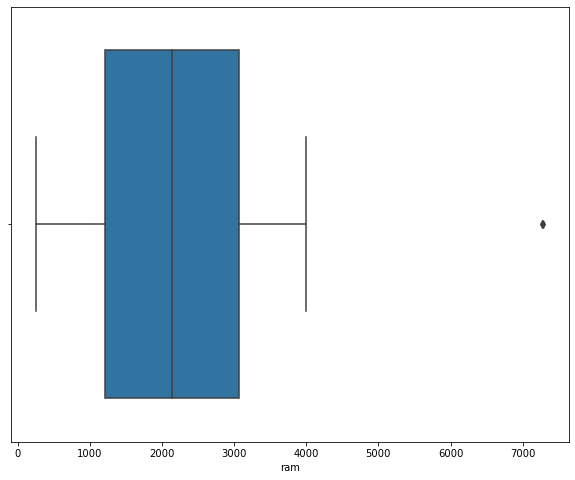

In [86]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(numeric_data['ram'],
            orient = 'v')

C:\Users\Razer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Razer\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='mobile_wt'>

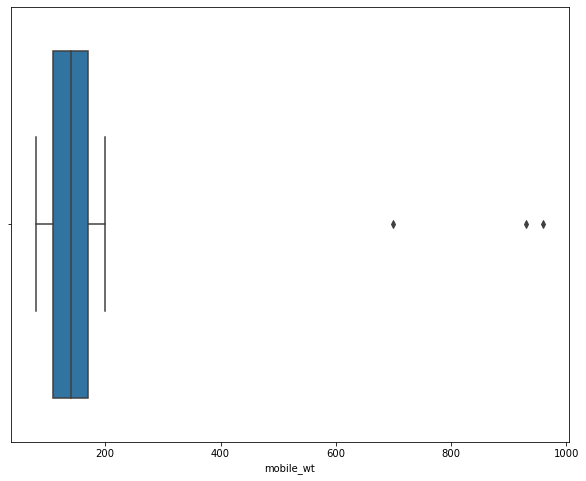

In [87]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(numeric_data['mobile_wt'],
            orient = 'v')

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

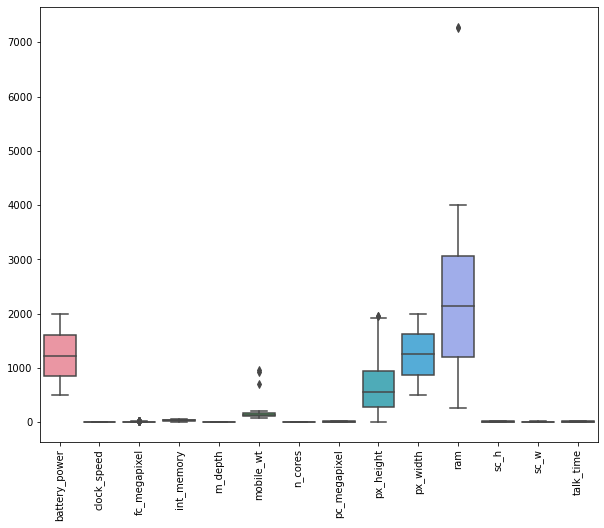

In [88]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = numeric_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

## Use z-score to standardize the boxplot for multiple categories

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(numeric_data)

In [90]:
scaled_data = pd.DataFrame(scaled_array, columns = numeric_data.columns)

scaled_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,-1.145740,0.383289,-0.787860,0.281262,1.461538
1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,1.703940,0.432536,1.112147,-0.636722,-0.734484
2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,1.074790,0.432536,-0.312858,-0.866218,-0.368480
3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,1.236704,0.583926,0.874646,0.510758,-0.002477
4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,0.931381,-0.968275,1.112147,-1.095714,-0.185479


In [91]:
scaled_data.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03
mean,-1.090745e-16,1.582694e-16,-4.273941e-17,-3.283366e-18,-2.971725e-17,-5.448162e-17,1.631666e-16,4.986265e-17,-1.111336e-16,-2.190395e-16,-4.452022e-18,7.423747e-17,7.949642e-17,-5.453727e-17
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.679377e+00,-1.254710e+00,-9.913549e-01,-1.654543e+00,-1.394222e+00,-1.351975e+00,-1.537835e+00,-1.635022e+00,-1.455654e+00,-1.737881e+00,-1.707896e+00,-1.737864e+00,-1.325210e+00,-1.649493e+00
25%,-8.799334e-01,-1.009616e+00,-7.609013e-01,-8.832348e-01,-1.047448e+00,-7.117106e-01,-6.633928e-01,-8.106517e-01,-8.174790e-01,-8.727999e-01,-8.405968e-01,-7.878601e-01,-8.662179e-01,-9.174857e-01
50%,-3.038194e-02,-2.923931e-02,-2.999940e-01,-1.739793e-03,-7.126678e-03,-5.212416e-03,-2.261716e-01,1.371885e-02,-1.815634e-01,-1.003134e-02,1.575839e-02,-7.535743e-02,-1.777300e-01,-2.476716e-03
75%,8.567502e-01,8.285904e-01,6.218205e-01,8.797552e-01,1.033195e+00,6.350516e-01,1.085492e+00,8.380894e-01,6.802548e-01,8.828069e-01,8.556979e-01,8.746462e-01,7.402540e-01,9.125322e-01
max,1.730217e+00,1.808967e+00,3.387264e+00,1.761250e+00,1.726742e+00,1.807673e+01,1.522713e+00,1.662460e+00,2.972036e+00,1.727071e+00,4.703368e+00,1.587149e+00,2.805718e+00,1.644539e+00


[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

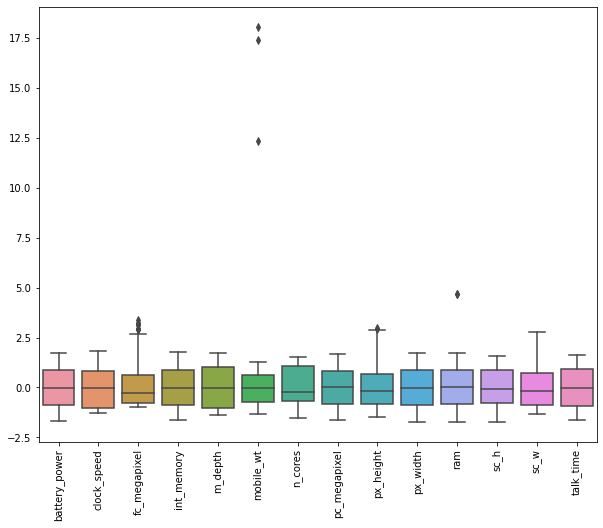

In [92]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = scaled_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [93]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

robust_scaled_array = robust_scaler.fit_transform(numeric_data)

In [94]:
robust_scaled_data = pd.DataFrame(robust_scaled_array, columns = numeric_data.columns)

robust_scaled_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.502295,0.466667,-0.333333,-0.78125,0.166667,0.770492,-0.50,-0.8,-0.820513,-0.646904,0.216667,-0.428571,0.285714,0.8
1,-0.267541,-0.666667,-0.500000,0.65625,0.333333,-0.081967,-0.25,-0.4,0.514329,0.976285,0.245699,0.714286,-0.285714,-0.4
2,-0.868197,-0.666667,-0.166667,0.28125,0.666667,0.000000,0.25,-0.4,1.054299,0.617918,0.245699,-0.142857,-0.428571,-0.2
3,-0.800000,0.666667,-0.500000,-0.68750,0.500000,-0.163934,0.50,-0.1,0.983409,0.710145,0.334946,0.571429,0.428571,0.0
4,0.831475,-0.666667,0.000000,-0.31250,0.333333,0.377049,-0.75,-0.3,0.663650,0.536232,-0.580108,0.714286,-0.571429,-0.1


In [95]:
robust_scaled_data.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,0.017494,0.015906,0.216959,0.000987,0.003425,0.003870,0.129323,-0.008321,0.121225,0.005714,-0.009290,0.045328,0.110634,0.001353
std,0.575955,0.544145,0.723393,0.567360,0.480741,0.742708,0.571936,0.606675,0.667843,0.569746,0.589668,0.601652,0.622638,0.546580
min,-0.949508,-0.666667,-0.500000,-0.937500,-0.666667,-1.000000,-0.750000,-1.000000,-0.850679,-0.984190,-1.016129,-1.000000,-0.714286,-0.900000
25%,-0.489180,-0.533333,-0.333333,-0.500000,-0.500000,-0.524590,-0.250000,-0.500000,-0.424585,-0.491436,-0.504839,-0.428571,-0.428571,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.510820,0.466667,0.666667,0.500000,0.500000,0.475410,0.750000,0.500000,0.575415,0.508564,0.495161,0.571429,0.571429,0.500000
max,1.013770,1.000000,2.666667,1.000000,0.833333,13.426230,1.000000,1.000000,2.105581,0.989460,2.763441,1.000000,1.857143,0.900000


[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

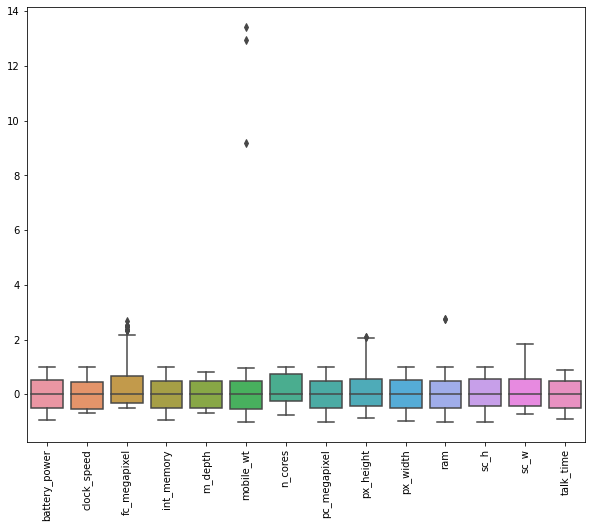

In [96]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = robust_scaled_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

## Remove outliers

In [97]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

battery_power     762.5
clock_speed         1.5
fc_megapixel        6.0
int_memory         32.0
m_depth             0.6
mobile_wt          61.0
n_cores             4.0
pc_megapixel       10.0
px_height         663.0
px_width          759.0
ram              1860.0
sc_h                7.0
sc_w                7.0
talk_time          10.0
dtype: float64


In [98]:
outliers_removed_data = numeric_data[~ ((numeric_data < (Q1 - 1.5 * IQR)) \
                                     | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)] # tilde removes outliers

outliers_removed_data.shape

(1971, 14)

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

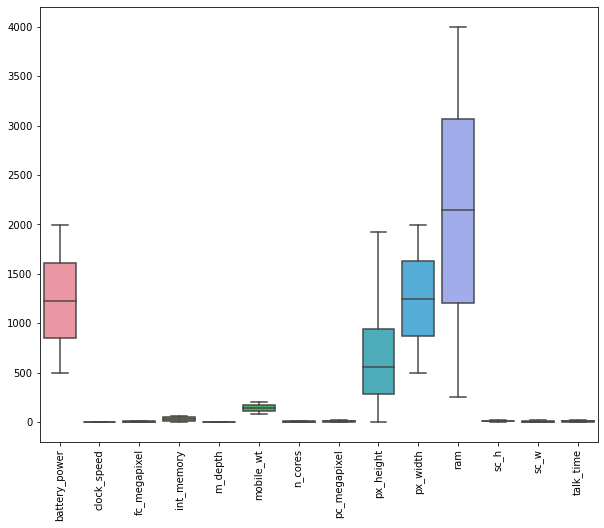

In [99]:
fig, ax = plt.subplots(figsize = (10, 8))

bp = sns.boxplot(data = outliers_removed_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
scaled_data = scaled_data.reset_index()

In [102]:
categorical_data = categorical_data.reset_index()

In [103]:
final_df = pd.concat([scaled_data, categorical_data], axis=1)

final_df.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,...,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,...,0.281262,1.461538,0,0,0,0,0,0,1,1
1,1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,...,-0.636722,-0.734484,1,1,1,1,1,1,0,2
2,2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,...,-0.866218,-0.368480,2,1,1,1,1,1,0,2
3,3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,...,0.510758,-0.002477,3,1,0,0,1,0,0,2
4,4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,...,-1.095714,-0.185479,5,0,1,0,1,0,0,1


In [104]:
final_df.isnull().sum()

index            0
battery_power    0
clock_speed      0
fc_megapixel     0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
index            0
bluetooth        0
dual_sim         0
four_g           0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [106]:
X = final_df.drop('price_range', axis=1)

y = final_df['price_range']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 101)

In [108]:
X_train.shape, X_test.shape

((1596, 22), (399, 22))

solver is optimisation algo  
    multinomial means more that 2 categories  
    maximum 10,000 iterations  

In [109]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='lbfgs',
                                    multi_class='multinomial',
                                    max_iter=10000)

In [110]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [111]:
logistic_model.score(X_test, y_test)

0.9298245614035088